<img alt="foto" height="100" src="https://i.postimg.cc/7H7zcX2c/CIMA-LOGO.png?dl=1" width="100"/>


# Avance N°1: Exploración de datos

**Marcello Anchante Fernandez**
Estudiante de Estadística Informática de la UNALM

GitHub: [Marcelloprime](https://github.com/Marcelloprime)

Instagram: [Marcello.2004](https://instagram.com/marcello.2004)


## CASO: 
Los datos que se utilizarán contienen información de varios vehículos manufacturados en el año 2000. Tenemos varios detalles del carro asi como la marca, modelo, tipo de caja y tipo de combustiblle. Lo más importante es que contiene el consumo de combustible y la cantidad de emisión de $CO_{2}$ que produce.

Los datos fueron obtenidos de la fuente [Kaggle](https://www.kaggle.com/datasets/krupadharamshi/fuelconsumption)

## DESCRIPCIÓN DE LAS VARIABLES

- **Year**: Año de fabricación del vehiculo.
- **MAKE**: Marca del vehiculo.
- **MODEL**: Modelo del vehiculo.
- **VEHICLE CLASS**: Tipo de vehiculo.
- **ENGINE SIZE**: Tamaño del motor.
- **CYLINDERS**: Cilindros del motor.
- **TRANSMISSION**: Tipo de transmisión: Automática(A3,A4,A5,AS5,AS6) o Manual(M5, M6).
- **FUEL**: Combustible utilizado(X, Z, otros).
- **FUEL CONSUMPTION**: Cantidad de combustible consumido por una distancia recorrida medido en litros/100 km.
- **COEMISSIONS**: Cantidad de CO2 emitido por vehículo en kg.

## LECTURA DE DATOS

In [2]:
# Librerías a usar

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('FuelConsumption.csv')
df

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


## LIMPIEZA DE DATOS

### Valores perdidos o nulos

Primero comprobaremos si existe valores nulos o perdidos en los datos

In [4]:
df.isna().sum() # Sumamos los NAs por variable

Year                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
COEMISSIONS         0
dtype: int64

Listo, ya se comprobó que no hay valores nulos o perdidos, tampoco la página donde se obtuvo los datos menciona algo respecto a datos nulos.
Ahora se eliminará la columna "Year" ya que todos los autos tienen la misma fecha de fabricación.


In [5]:
df = df.drop('Year', axis=1) # Eliminará la variable Year
df

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...
634,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


### Transformación de variables

Observamos que hay variables que son consideradas numéricas cuando deberían ser factores o categóricas.
Además, crearemos una nueva variable con el tipo de transmisión con los valores "Automático" y "Mecánico".

En los vehículos existen los carros automáticos y mecánicos, dentro de los automáticos existen los simples y los secuenciales con "N" número de marchas.
Los carros con transmisión A3, A4 y A5 son carros de tranmisión automática simple.
Los carros con transmisión AS4, AS5 y AS6 son carros de transmisión automática secuencial.

Agregando a los carros mecánicos, solo se presentan los carros mécanicas de 5 marchas(M5) y 6 marchas(M6).


In [6]:
lista = []
for i in df['TRANSMISSION']:
    if i in ['A3','A4','A5','AS4','AS5','AS6']:
        lista.append('Automatic')
    else:
        lista.append('Mecanic')
df['TRANSMISSION_TYPE'] = lista

In [7]:
df[['ENGINE SIZE','CYLINDERS']]  = df[['ENGINE SIZE','CYLINDERS']].astype('category')
df

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS,TRANSMISSION_TYPE
0,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216,Automatic
1,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205,Mecanic
2,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265,Automatic
3,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301,Automatic
4,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230,Automatic
...,...,...,...,...,...,...,...,...,...,...
634,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288,Automatic
635,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274,Automatic
636,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274,Automatic
637,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260,Mecanic


## EXPLORACIÓN DE DATOS

El dataframe presente solo dos variables númericas: "FUEL CONSUMPTION" y "COEMISSIONS".
Por lo cual, trabajaremos con sus estadísticas descriptivas.
Para ello, utilizaremos la función `describe` de pandas para hallar la **media**, **desviación estándar**, **percentiles**, **máximos** y **mínimos**.

In [8]:
df.describe().round(2)

,FUEL CONSUMPTION,COEMISSIONS
count,639.00,639.00
mean,14.71,296.81
std,3.31,65.50
min,4.90,104.00
25%,12.50,253.00
50%,14.40,288.00
75%,16.60,343.00
max,30.20,582.00


In [9]:
df.groupby('TRANSMISSION_TYPE').mean('FUEL CONSUMPTION')

,FUEL CONSUMPTION,COEMISSIONS
TRANSMISSION_TYPE,,
Automatic,15.257176,307.421176
Mecanic,13.634112,275.733645


Por variable, tendremos las siguientes estadísticas.


### Consumo de combustible

- La media de consumo de combustible por cada 100 km es de 14.71 litros.
- La desviación estándar del consumo por cada 100 km es de 3.31 litros.
- El 75% de los vehículos tiene un consumo por cada 100 km menor a 16.60.
- El carro con el consumo más bajo(Honda Insight) solo consume 4.9 litros por cada 100 km.
- El carro con el consumo más alto(Ferrari 550 Maranello) sorprende con los 30.20 litros por cada 100 km recorridos.


### Emisión de CO2

- El promedio de emisión de CO2 es de 296.81 kg.
- La desviación estándar de la emisión de CO2 es de 65.50 kg.
- El 50% de los vehículos tiene un consumo menor a 288 kg.
- El vehículo con la menor cantidad de CO2 emitido es el Honda Insight con 104 kg.
- El vehículo con la mayor cantidad de CO2 emitido es el Ferrari 550 Maranello.

### Promedio de consumo de vehículos y emisión de CO2 por tipo de transmisión

- Los carros mecánicos presentan una mejor eficiencia(menor consumo) frente a los carros mecánicos.
- Más adelante se verá que el consumo de combustible es proporcional a la emisión de $CO_{2}$ ya que en los promedios también se mostró lo mismo. Los carros automáticos consumen menos combustible, por lo tanto, la emisión de $CO_{2}$ es menor a comparación de los carros mécanicos.



## VISUALIZACIÓN DE DATOS

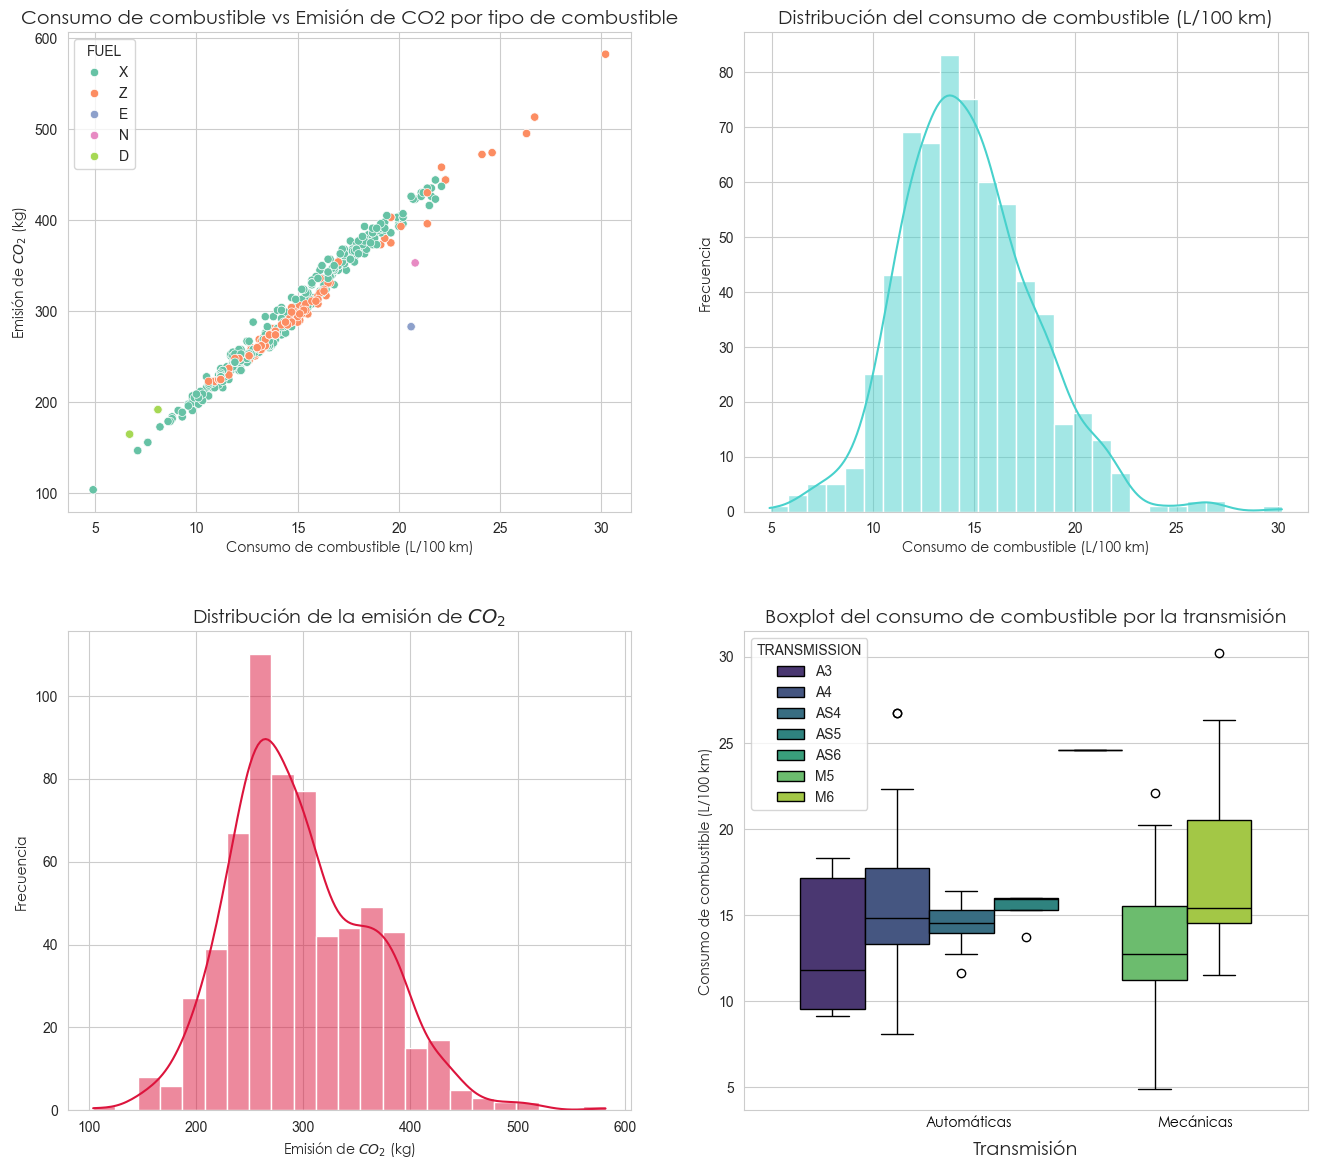

In [10]:
# Personalización del gráfico

font={'fontsize': 12,
                    'fontweight': 'normal',
                    'fontname': 'Century Gothic',
                    }

fig, ax = plt.subplots(2,2, figsize=(16,14))

# Gráfico 1: Consumo de combustible vs Emision de CO2

sns.scatterplot(x = df['FUEL CONSUMPTION'], y = df['COEMISSIONS '], ax = ax[0,0], hue = df['FUEL'], markers=True, palette='Set2')
ax[0,0].set_title('Consumo de combustible vs Emisión de CO2 por tipo de combustible',fontdict=font, fontsize = 14)
ax[0,0].set_xlabel('Consumo de combustible (L/100 km)', fontdict=font, fontsize = 10)
ax[0,0].set_ylabel('Emisión de $CO_{2}$ (kg)', fontdict=font, fontsize = 10)

# Grafico 2: Histograma de Consumo de combustible

sns.histplot(df['FUEL CONSUMPTION'], ax=ax[0,1], kde = True, color = 'mediumturquoise')
ax[0,1].set_title('Distribución del consumo de combustible (L/100 km)',fontdict=font, fontsize = 14)
ax[0,1].set_xlabel('Consumo de combustible (L/100 km)', fontdict=font, fontsize = 10)
ax[0,1].set_ylabel('Frecuencia', fontdict=font, fontsize = 10)

# Grafico 3: Histograma de emisión de CO2

sns.histplot(df['COEMISSIONS '], ax=ax[1,0], kde = True, color = 'crimson')
ax[1,0].set_title('Distribución de la emisión de $CO_{2}$',fontdict=font, fontsize = 14)
ax[1,0].set_xlabel('Emisión de $CO_{2}$ (kg)', fontdict=font, fontsize = 10)
ax[1,0].set_ylabel('Frecuencia', fontdict=font, fontsize = 10)

# Grafico 4: Boxplot de Consumo de Combustible por Transmisión

sns.boxplot(y = df['FUEL CONSUMPTION'], hue = df['TRANSMISSION'], ax=ax[1,1], hue_order=['A3','A4','AS4','AS5','AS6','M5','M6'], palette = 'viridis', linecolor='black')
ax[1,1].set_title('Boxplot del consumo de combustible por la transmisión', fontdict=font, fontsize = 14)
ax[1,1].set_xlabel('Transmisión', fontdict=font, fontsize = 14, labelpad=15)
ax[1,1].set_ylabel('Consumo de combustible (L/100 km)', fontdict=font, fontsize = 10)
plt.text(-0.1, 2.7, 'Automáticas', horizontalalignment='center', size=10, color='black', weight='normal', fontdict = {'fontname':'Century Gothic'})
plt.text(0.3, 2.7 , 'Mecánicas', horizontalalignment='center', size=10, color='black', weight='normal', fontdict = {'fontname':'Century Gothic'})

# Parámetros como fuente general, tamaño de la fuente y espacio entre gráficos

plt.rcParams['font.family'] = ['Century Gothic'] # Fuente para todo el documento
plt.rcParams['font.size'] = 10
plt.subplots_adjust(hspace=0.25)

# Muestra el gráfico

plt.show()

# Guardando los gráficos

fig.savefig('grafico.svg') # Guardando como vector
fig.savefig('grafico.png') # Guardando como png

### Gráfico de dispersión: Consumo de combustible vs Emisión de CO2

- Existe una relación lineal y positiva entre la emisión de $CO_{2}$ y consumo de combustible, es decir, mientras hay un mayor consumo de combustible, aumentará la emisión de los gases $CO_{2}$. 

- Los combustibles más comunes son el tipo "X" y "Z".

### Gráfico de histograma: Distribución del consumo de combustible

- Observamos una asimetría hacia la derecha, es decir, la mayoría de los datos se distribuyen a la izquierda.

- La mayoría de los datos se encuentran en los 10 y 20 L por cada 100 km.

### Gráfico de histograma: Distribución de la emisiónde $CO_{2}$

- Observamos una asimetría hacia la derecha, es decir, la mayoría de los datos se distribuyen a la izquierda. La mayoría de carros de emisión de $CO_{2}$.

- La mayoría de vehiculos emite entre 200 y 400 kg de $CO_{2}$.

### Gráfico de cajas: Consumo de combustible por transmisión

Teniendo en cuenta que existen dos tipos de transmisiones: Automática(A3, A4, AS4, AS5, AS6) y Mecánico(M5, M6), compararemos cada transmisión con el consumo de combustible. 
En el caso de carros de transmisión automática, se clasifican en dos tipos: carros con transmisión automática simple(A3, A4) y carros con transmisión automática secuencial(AS5, AS6).

- En el grupo de carros con transmisión automática, podemos observar que los carros con transmisión tipo automático, la transmisión A3 es la eficiente. La transmisión automática más menos es la AS6.
- En los dos subgrupos de caja automática(Simple y Secuencial), en cada uno se puede observar una relación directamente proporcional entre el número de cambios y el consumo de combustible.
 